# Naive Bayes to predict Breast Cancer

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("./breast_cancer.csv")

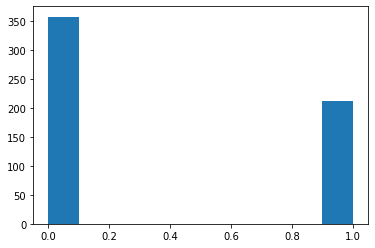

In [24]:
data = data.drop(data[['Unnamed: 32', 'id']],axis =1) #dropping the unnamed bad column
data[['diagnosis']] = data[['diagnosis']].replace(['M'], 1).replace(['B'], 0) #replacing Malignant with 1s and Benign with 0s
plt.hist(data['diagnosis'])
plt.show()

In [25]:
data.groupby('diagnosis').count()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [26]:
data.shape

(569, 31)

<AxesSubplot:xlabel='perimeter_worst', ylabel='Count'>

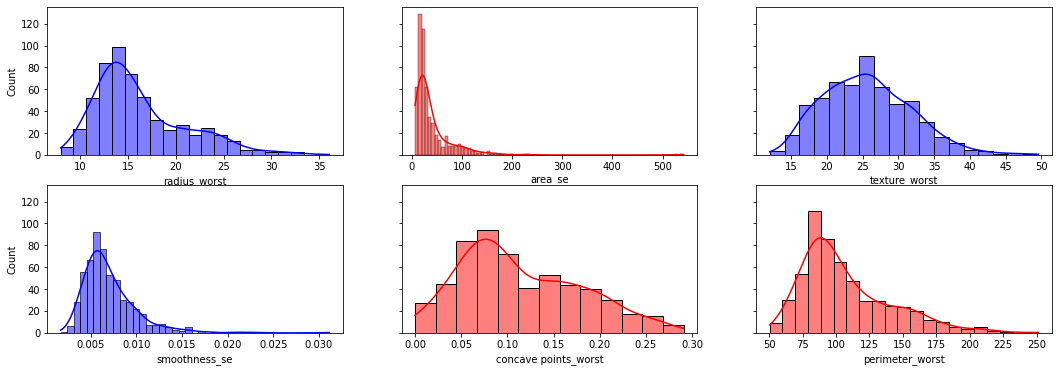

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0][0], x="radius_worst", kde=True, color='b')
sns.histplot(data, ax=axes[0][1], x="area_se", kde=True, color='r')
sns.histplot(data, ax=axes[0][2], x="texture_worst", kde=True, color='b')
sns.histplot(data, ax=axes[1][0], x="smoothness_se", kde=True, color='b')
sns.histplot(data, ax=axes[1][1], x="concave points_worst", kde=True, color='r')
sns.histplot(data, ax=axes[1][2], x="perimeter_worst", kde=True, color='r')

### Separating the data into 2 classes

In [28]:


class1 = data[data['diagnosis']==1]
class0 = data[data['diagnosis']==0]

print(class0.shape,class1.shape)



(357, 31) (212, 31)


**calculating prior class probabilities**

In [29]:
feature_data = data[['radius_worst', 'texture_worst', 'smoothness_se','diagnosis']]

prior1 = len(class1)/len(data)
prior0 = len(class0)/len(data)

prior =[prior0,prior1]

## Finding the Guassian curve for both class (likelihood)

p(xi|μ,σ) = (1/σ*2π)exp(-(xi-μ)^2/2σ^2)

In [30]:
def calculate_likelihood(df, feature, feat_val, Y, label):
    cols = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feature].mean(), df[feature].std()
    likelihood= (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return likelihood


**Since we know that our data has 2 lables, we initialize our lables array with 0,1**

In [31]:
labels = [0,1]

In [32]:
def naive_bayes(df, X, Y):
    features = list(feature_data.columns)[:-1]

    Y_pred = []
    for x in range(len(X)):
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood(feature_data, features[i], X.iloc[x, i], Y, labels[j])
                
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 


**Test Train Split**

In [33]:
suf_data = pd.DataFrame.sample(feature_data,frac=1)
train_size = int(0.7*len(data))

train_data = suf_data[:train_size]
test_data = suf_data[train_size:]
X_train = train_data[['radius_worst', 'texture_worst', 'smoothness_se']]
X_test = test_data[['radius_worst', 'texture_worst', 'smoothness_se']]

Y_train = train_data[['diagnosis']]
Y_test = test_data[['diagnosis']]

In [34]:
Y_pred = naive_bayes(train_data, X=X_test, Y="diagnosis")
print(Y_pred)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1]


In [35]:
from sklearn.metrics import confusion_matrix, f1_score
f = f1_score(Y_test, Y_pred)
print("F1 score: ",f)

F1 score:  0.9387755102040817
